#  Churn Prediction using Machine Learning 
## 1. Introduction

In this project, we aim to predict customer churn using various machine learning models. We use the Telco Customer Churn dataset from Kaggle. The project includes EDA, preprocessing, modeling, evaluation, and visualization of results.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading and Cleaningmn.


In [2]:
import os
print(os.getcwd())

D:\Projects\1. Telco-Customer-Churn\Churn Prediction\notebooks


In [3]:
df=pd.read_csv(r'../data/Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Check for Null values in `TotalCharges`

In [6]:
(df['TotalCharges'] == ' ').sum()

11

In [7]:
df['TotalCharges']= df["TotalCharges"].replace(' ',pd.NA)
df.loc[df["TotalCharges"].isnull(),['TotalCharges','MonthlyCharges','tenure']]

,TotalCharges,MonthlyCharges,tenure
488,<NA>,52.55,0
753,<NA>,20.25,0
936,<NA>,80.85,0
1082,<NA>,25.75,0
1340,<NA>,56.05,0
3331,<NA>,19.85,0
3826,<NA>,25.35,0
4380,<NA>,20.00,0
5218,<NA>,19.70,0
6670,<NA>,73.35,0


In [8]:
# replace empty strings with NaN and then convert to numeric
df['TotalCharges']= pd.to_numeric(df["TotalCharges"],errors= 'coerce')
df.loc[df['TotalCharges'].isnull(),'TotalCharges']=df['MonthlyCharges']*df['tenure']
df.drop(columns=['customerID'],inplace= True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Loaded the dataset using `pandas`.
- Removed `customerID` as it's a unique identifier and has no predictive power.
- Handled missing or empty values in the `TotalCharges` column.

# 3. Exploratory Data Analysis (EDA)

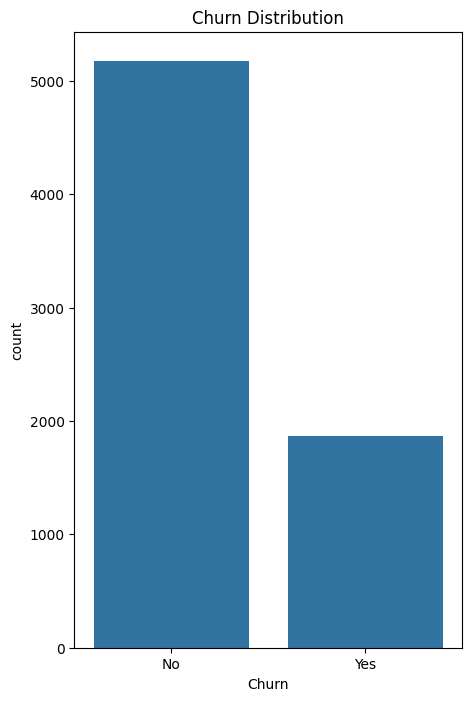

In [10]:
plt.figure(figsize=(5,8))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

In [11]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

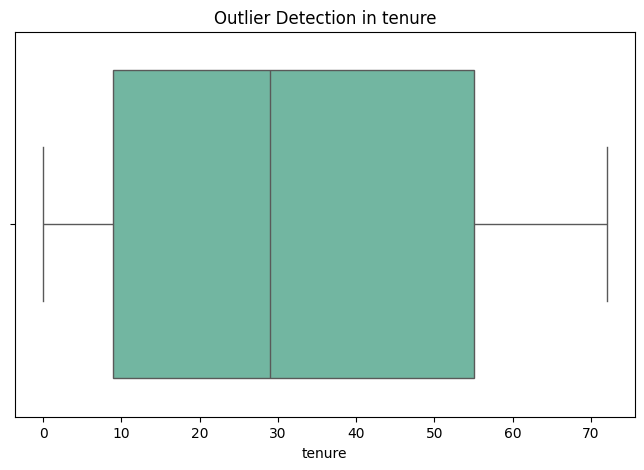

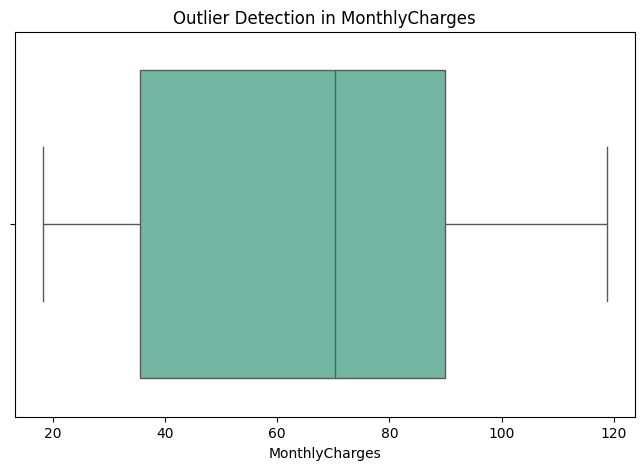

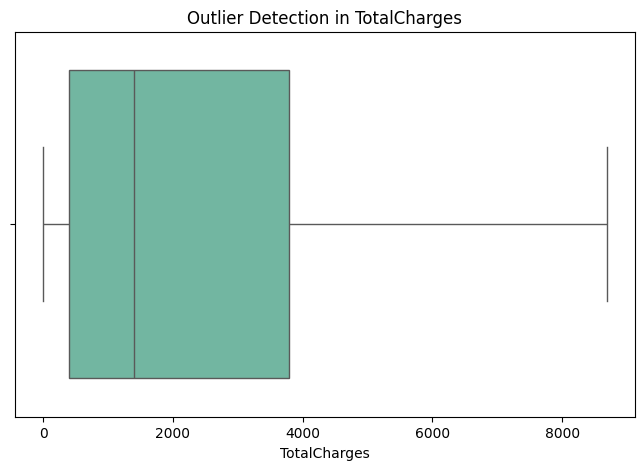

In [12]:
features = df.select_dtypes(include=['int','float']).columns

for feature in features:
    if feature !='SeniorCitizen':
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=feature, palette='Set2',orient='h')
        plt.title(f"Outlier Detection in {feature}")
        plt.show()

<Axes: >

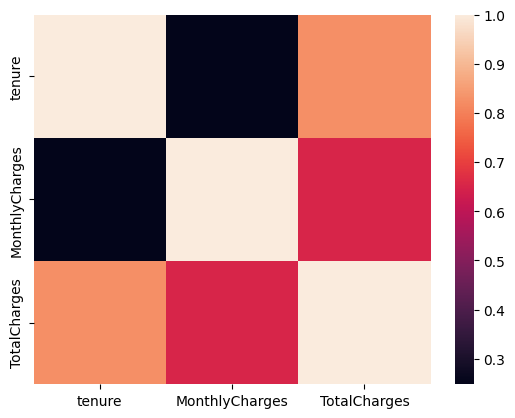

In [13]:
sns.heatmap((df.select_dtypes(include=['int', 'float']).drop(columns='SeniorCitizen')).corr())

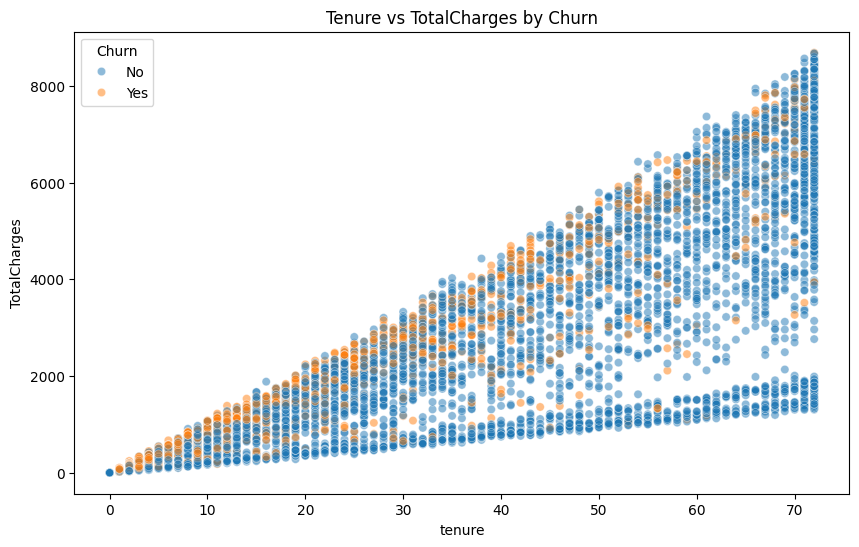

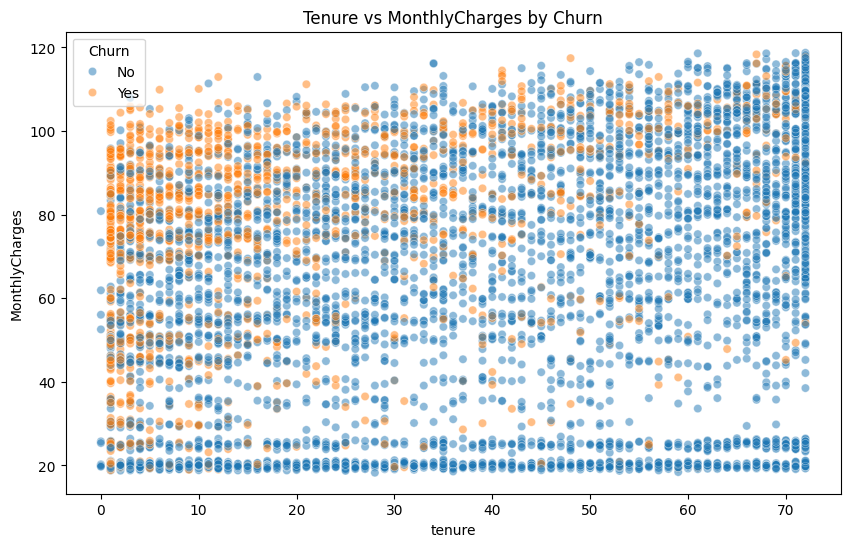

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', alpha=0.5)
plt.title("Tenure vs TotalCharges by Churn")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.5)
plt.title("Tenure vs MonthlyCharges by Churn")
plt.show()

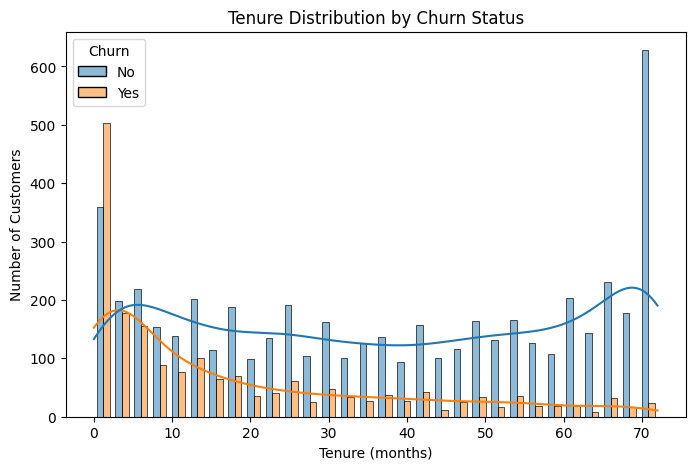

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(x='tenure',data=df,hue='Churn',multiple='dodge',bins=30,shrink=0.7,kde=True)
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

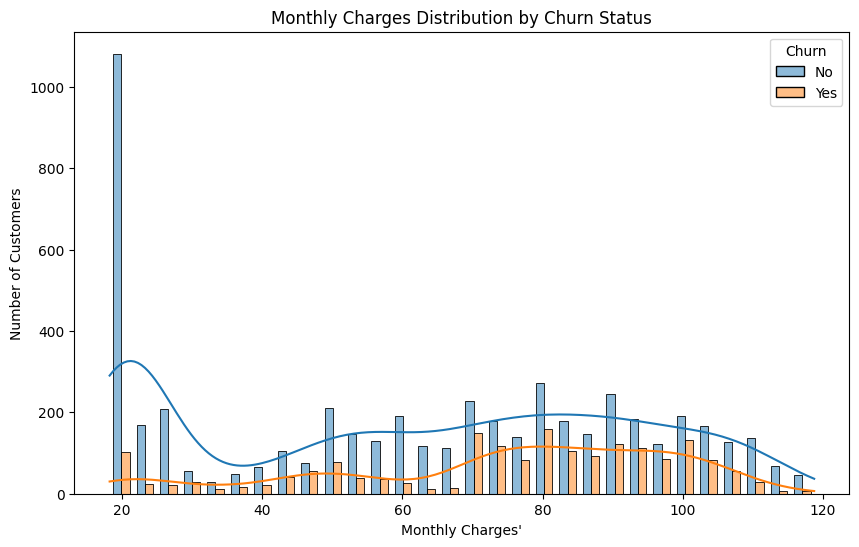

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x='MonthlyCharges',data=df,hue='Churn',multiple='dodge',bins=30,shrink = 0.7,kde=True)
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Monthly Charges'")
plt.ylabel("Number of Customers")
plt.show()

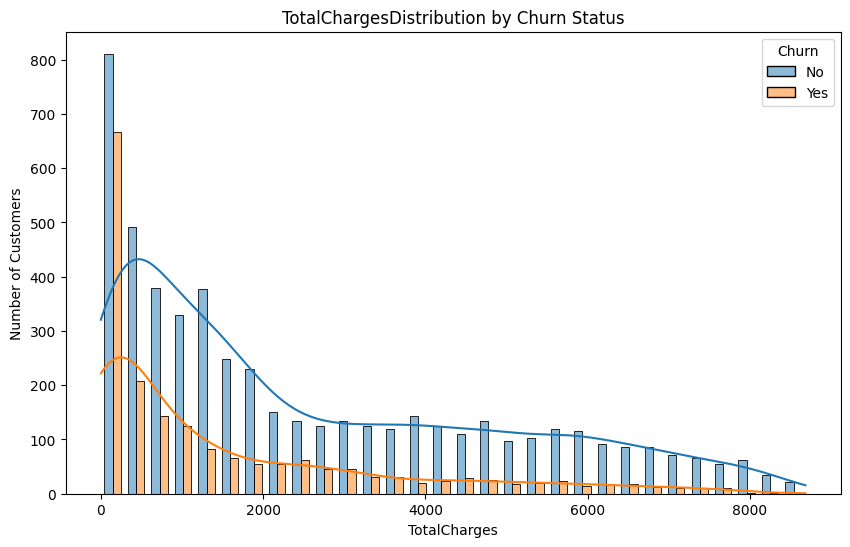

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x='TotalCharges',data=df,hue='Churn',multiple='dodge',bins=30,shrink = 0.7,kde=True)
plt.title("TotalChargesDistribution by Churn Status")
plt.xlabel("TotalCharges")
plt.ylabel("Number of Customers")
plt.show()

- Visualized the distribution of target variable `Churn` and analyzed relationships between numerical features and churn using scatter plots and histograms.


 # 4. Feature Engineering

In [18]:
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)
df.replace('No phone service','No',inplace = True)
df.replace('No internet service','No',inplace = True)

In [19]:
def col_value(df):
    for column in df:
         if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')
col_value(df)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
obj_col=df.select_dtypes(include='object').drop(
    columns=['InternetService','Contract','PaymentMethod']).columns

for col in obj_col:
    df[col].replace({'Yes':1,'No':0},inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
col_value(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [24]:
bool_col = df1.select_dtypes(include='bool').columns
df1[bool_col]=df1[bool_col].astype(int)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
# Scale tenure, MonthlyCharges,TotalCharges

ss=StandardScaler()

scale_col = ['tenure', 'MonthlyCharges','TotalCharges']
df1[scale_col]=ss.fit_transform(df1[scale_col])

In [26]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.066327,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,-1.236724,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.514251,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,-1.236724,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


- Converted binary categorical variables to 0/1.
- Created dummy variables for multi-category features.
- Standardized numerical features like `tenure`, `MonthlyCharges`, and `TotalCharges`.


In [27]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0.54447804  0.88073469  0.7585736  -0.25943549 -1.31816495
  0.26992924]
PhoneService:[0 1]
MultipleLines:[0 1]


# Train the Model

In [28]:
X=df1.drop(columns='Churn',axis=1)
y=df1['Churn']

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 26)
(1409, 26)
(5634,)
(1409,)


In [33]:
# === Models ===

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


==== Random Forest Classification Report ====
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



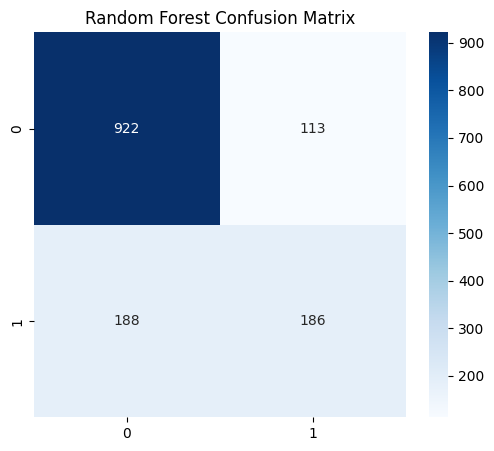


==== SVM Classification Report ====
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



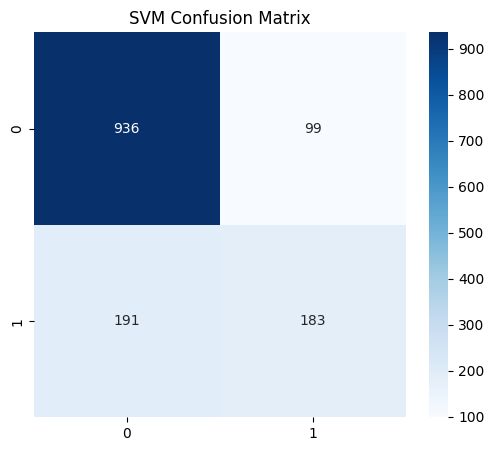


==== XGBoost Classification Report ====
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



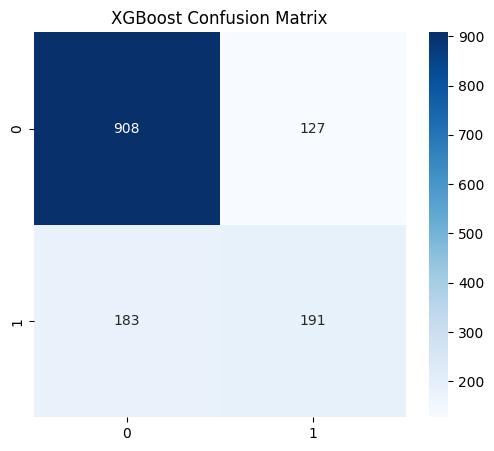

In [34]:
results=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = model.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"\n==== {name} Classification Report ====")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1, 'ROC-AUC': auc})


In [35]:
# Show results in a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)


Summary of Model Performance:
           Model  Accuracy  F1 Score   ROC-AUC
0  Random Forest  0.786373  0.552749  0.823146
1            SVM  0.794180  0.557927  0.800236
2        XGBoost  0.779986  0.552023  0.822661


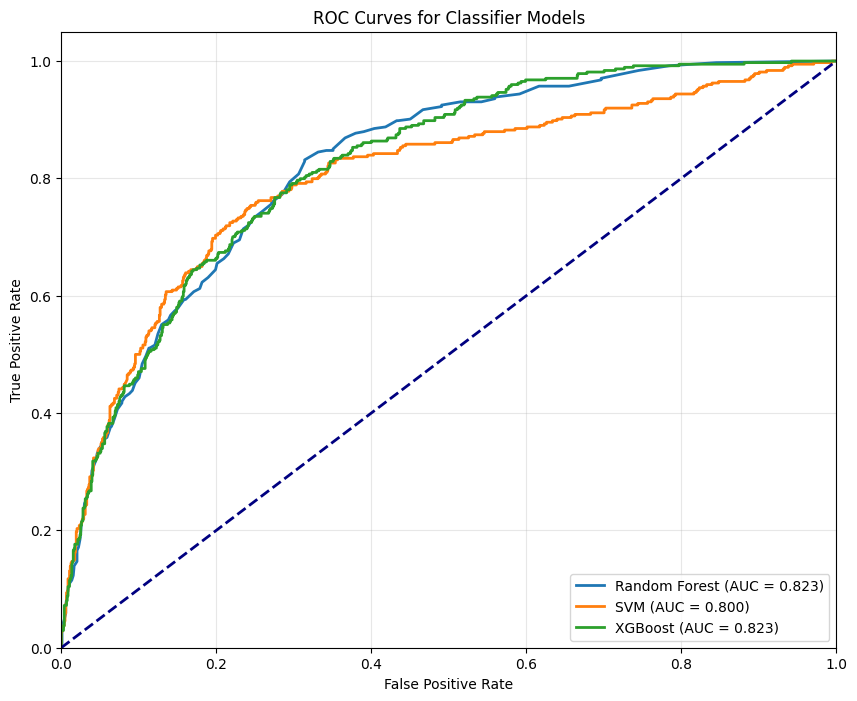

In [36]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifier Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [37]:
df_export = df1.copy()

# Map binary columns back to original labels
df_export['gender'] = df_export['gender'].map({0: 'Male', 1: 'Female'})
df_export['Partner'] = df_export['Partner'].map({0: 'No', 1: 'Yes'})
df_export['Dependents'] = df_export['Dependents'].map({0: 'No', 1: 'Yes'})
df_export['PhoneService'] = df_export['PhoneService'].map({0: 'No', 1: 'Yes'})
# Do this for other binary columns as needed

# Optional: Create readable churn label
df_export['Churn_Label'] = df_export['Churn'].map({0: 'No', 1: 'Yes'})

# Save to CSV for Power BI
df_export.to_csv('../outputs/churn_cleaned.csv', index=False)
